In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [6]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
data.target_names


['MedHouseVal']

In [10]:
dataset  = pd.DataFrame(data.data,columns = data.feature_names)

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
dataset['Price'] = data.target

In [15]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [18]:
import seaborn as sns

<Axes: >

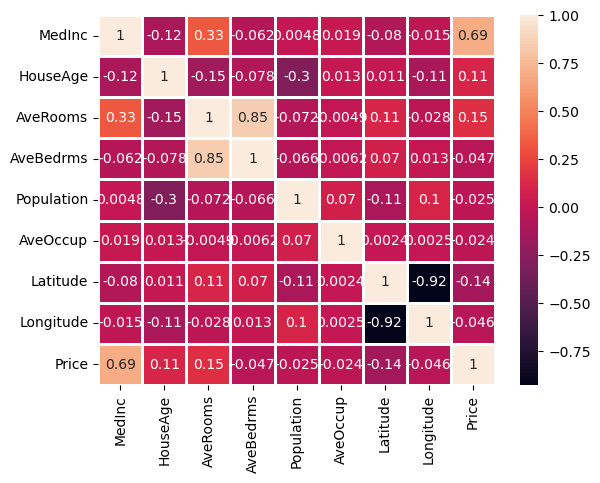

In [26]:
sns.heatmap(dataset.corr(),annot=True,)

In [27]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [28]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [30]:
#splitting the data into train  and test dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33,random_state = 42)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

### Scalling  the data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
X_train_scaled_data = scaler.fit_transform(X_train)
X_test_scaled_data = scaler.transform(X_test)

### Model Training 

In [46]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

In [62]:
model = regressor.fit(X_train_scaled_data, y_train)

In [65]:
model.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [66]:
model.intercept_

2.0666362048018536

In [78]:
y_pred_value = regressor.predict(X_test_scaled_data)

In [79]:
y_pred_value.shape

(6812,)

### Performance Metrics MSE , MAE , RMSE

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [83]:
mse = mean_squared_error(y_test,y_pred_value)
mae = mean_absolute_error(y_test,y_pred_value)
rmse = np.sqrt(mse)

In [84]:
mse,mae,rmse

(0.5369686543372459, 0.5295710106684453, 0.7327814505957735)

### Check Accuracy of the model  R squared and adjusted R squared 

In [85]:
from sklearn.metrics import r2_score

In [86]:
score = r2_score(y_test , y_pred_value)

In [87]:
score

0.5970494128783952

In [88]:
1 - (1-score ) * (len(y_test)-1)/(len(y_test)-X_test_scaled_data.shape[1]-1)

0.5965755624158091

### Save the model in File format for later use

In [89]:
import pickle

In [92]:
reg_pickle = pickle.dump(regressor , open('Linear_reg_pickle.pkl','wb'))

In [94]:
scale_pickle = pickle.dump(scaler, open('Scale_reg_pickle.pkl','wb'))

In [95]:
## Use the model

In [99]:
open_scale_pickle = pickle.load(open('Scale_reg_pickle.pkl','rb'))

In [101]:
open_reg_pickle = pickle.load(open('Linear_reg_pickle.pkl','rb'))

In [102]:
open_reg_pickle.predict((open_scale_pickle.fit_transform(X_test)))

array([0.70176182, 1.75672011, 2.73470125, ..., 1.25697059, 1.65515384,
       2.28422378])